

### 1. Metadata  
####Description
This dataset provides an overview of some factors that might affect student's performance in exams. 

####Column Descriptions
- **Gender**:	Gender of the student (Male, Female).
- **Race/ethnicity**    Race of ethnicity of a student (groups from A to E).
- **Parental_education**:	Level of parental education (school, some colledge, bachelor degree, etc.).
- **Lunch**:	Standard of free/reduced lunch.
- **Test preparation course**:	Has a student completed a preparation course (Yes, No).
- **Math score**: Final score for math exam (0-100).
- **Reading score**:	Final score for reading exam (0-100).
- **Writing score**:	Final score for writing exam (0-100).


In [4]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [5]:
dataset = pd.read_csv("StudentsPerformance.csv", skipinitialspace=True)
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  1000
#Features =  8


In [9]:
# samples with missing values
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  0


No missing data.


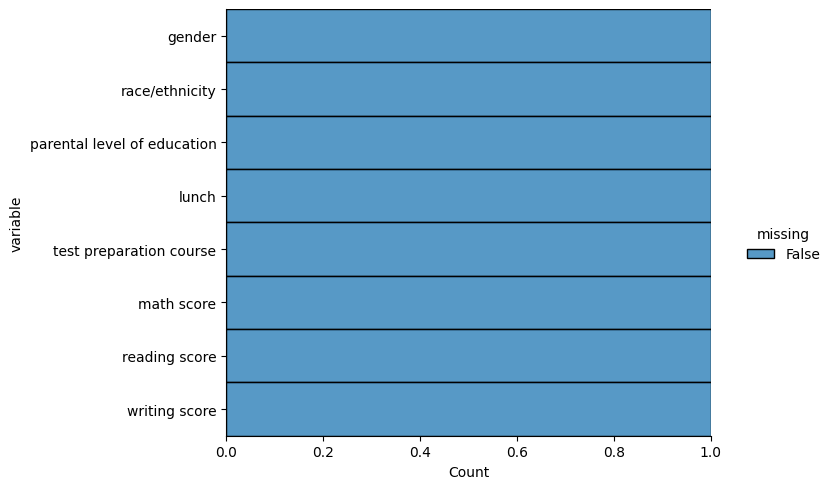

In [10]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [41]:
# list of numerical variables
numerical_cols = ['math score', 'writing score','reading score']

In [42]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

In [43]:
numerical_cols

['math score', 'writing score', 'reading score']

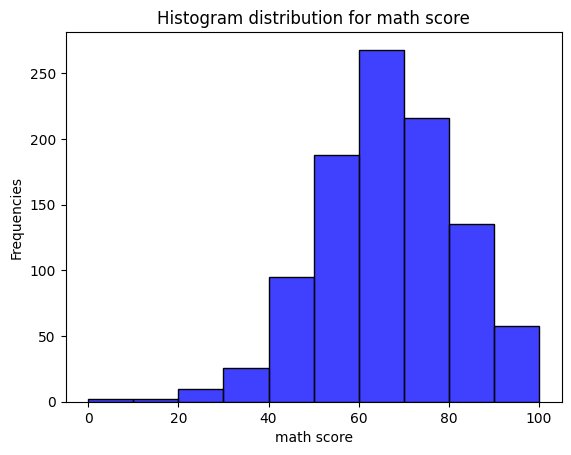

In [44]:
hist_frequencies(dataset,'math score', 10)

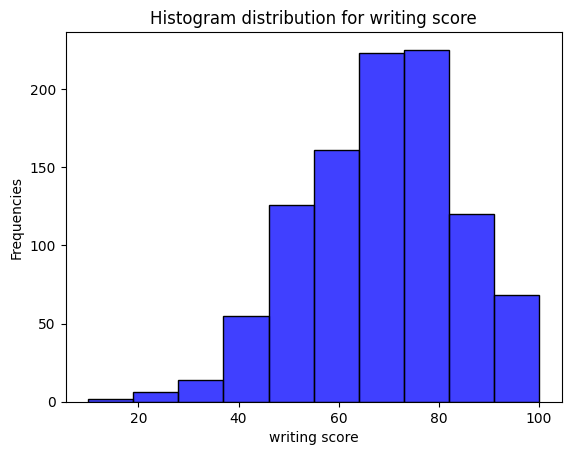

In [45]:
hist_frequencies(dataset,"writing score", 10)

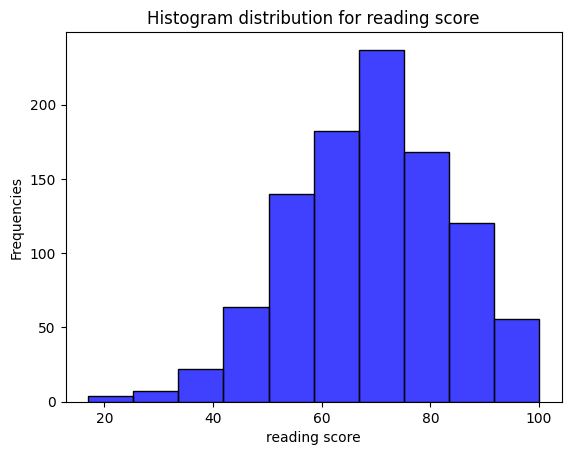

In [46]:
hist_frequencies(dataset,"reading score", 10)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [47]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

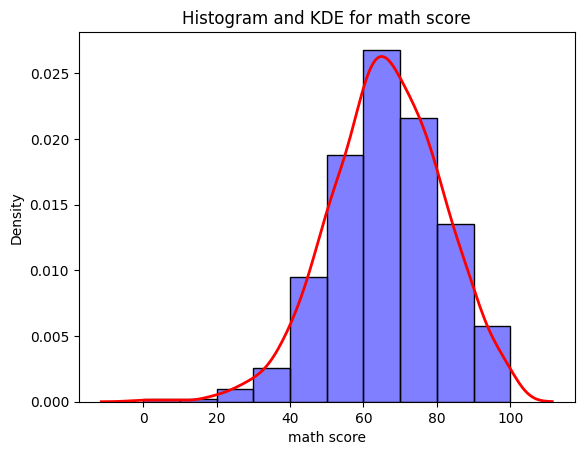

In [48]:
hist_density(dataset, "math score", 10)

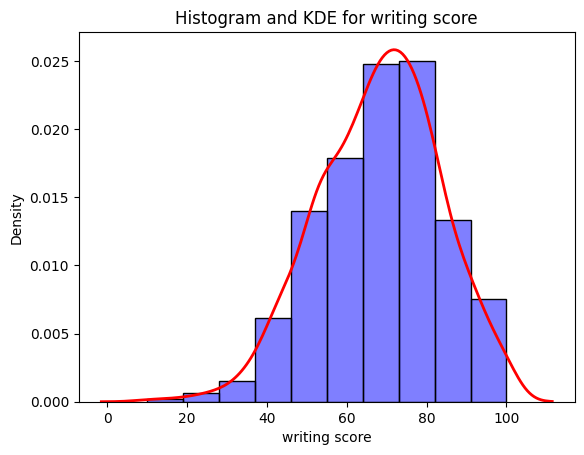

In [49]:
hist_density(dataset, "writing score", 10)

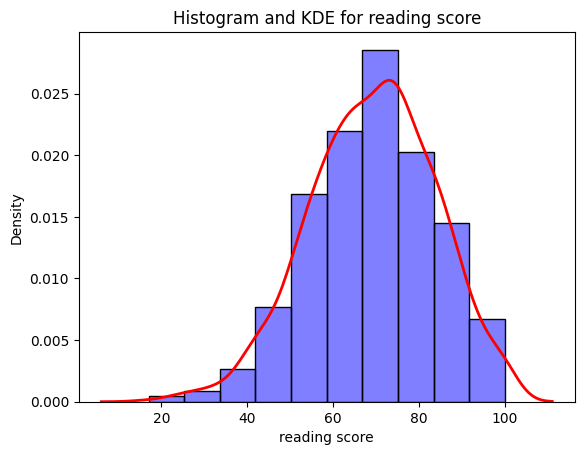

In [50]:
hist_density(dataset, "reading score", 10)

According to these histograms all scores have normal distibution.

Math score: most of the students have 60-70 points for this exam, with very few having more than 90 and less than 50


In [51]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

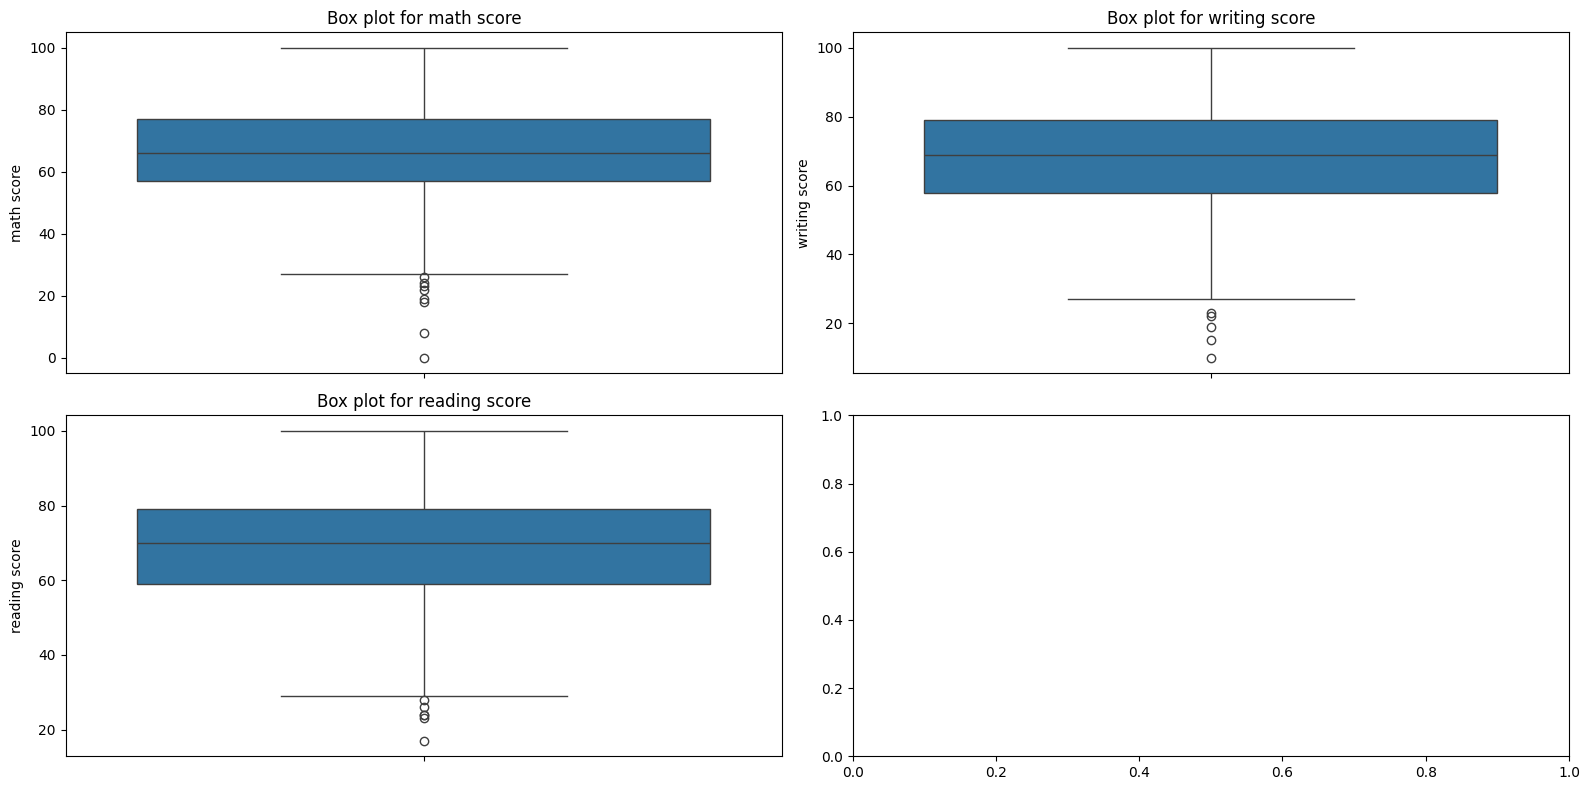

In [52]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

According to these boxes we can say that a student on average gets 65 points for math exam, 70 for writing and 70 for reading.

In [53]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,math score,writing score,reading score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,68.054000,69.169000
std,15.16308,15.195657,14.600192
min,0.00000,10.000000,17.000000
25%,57.00000,57.750000,59.000000
50%,66.00000,69.000000,70.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Correlation Analysis


The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [54]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

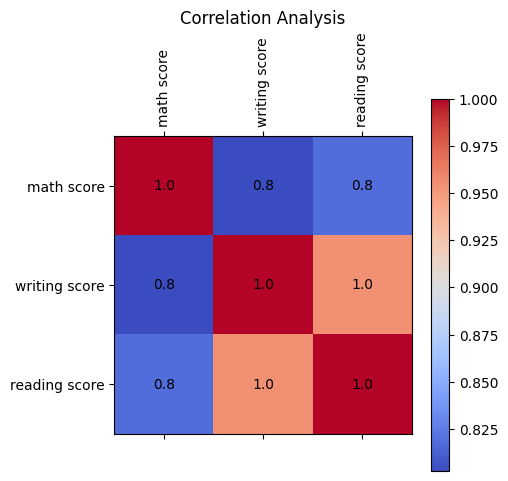

In [55]:
plot_correlation(dataset, numerical_cols)

We don't have much numerical columns so its really hard to get anything from it, but we can definitely see high level of correlation between reading score and writing score, which is obvious why.

In [56]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)

    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

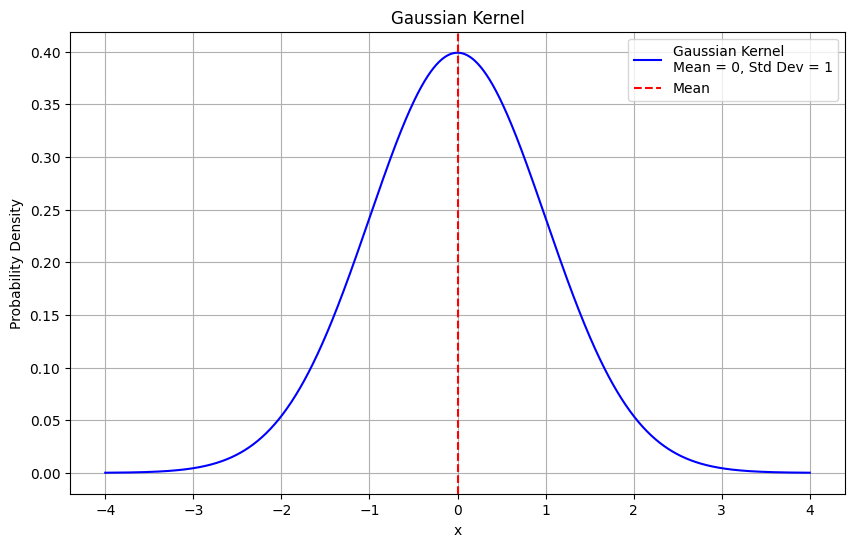

In [57]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [58]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

ModuleNotFoundError: No module named 'scipy'